<a href="https://colab.research.google.com/github/BrandonOrtiz7/Metodos-numericos/blob/main/Neville.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

METODO DE NEVILLE

El método construye el polinomio interpolante en forma recursiva, llenando una tabla triangular (como la que se usa en la programación dinámica). Su ventaja es que permite obtener el valor aproximado de la función sin tener que calcular explícitamente todo el polinomio.

La fórmula recursiva que usa es:

$Q_{i,j} = \frac{(x - x_{i-j}) Q_{i,j-1} - (x - x_i) Q_{i-1,j-1}}{x_i - x_{i-j}}
$

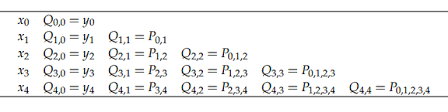

In [36]:
from tabulate import tabulate

def neville(x, xi, fxi): #x:punto en el que queremos aproximar, xi:lista de valores, fxi:valores de la funcion evaluados en xi
    n = len(xi)

    Q = [[0.0 for _ in range(n)] for _ in range(n)] #creamos una tabla Q de tamaño nxn en donde todo esta inicializado en 0.0, es una MATRIZ
    #_ se usa para indicar que no necesitamos iterar la variable, lo que nos interesa es saber cuantas bveces se repite

    for i in range(n):  #creamos la primer columna de la tabla
        Q[i][0] = fxi[i]

    for i in range(1, n):        #empezamos desde la posicion 1 ya que en la 0 ya tenemos los valores de fxi
        for j in range(1, i + 1):     #cuando i = 1, solo se calcula Q[1][1].Luego, cuando i = 2, calculamos Q[2][1] y Q[2][2]
            xi_j = xi[i - j]      #este valor es xi-j
            xi_i = xi[i]          #este valor es xi
            num = (x - xi_j) * Q[i][j - 1] - (x - xi_i) * Q[i - 1][j - 1] #calculamos de numerador usando la formula        #i SON LOS RENGLONES, j SON LAS COLUMNAS
            den = xi_i - xi_j  #calculamos el denominador usando la formula
            Q[i][j] = num / den      #obtenemos el resultado y lo guardamos en la tabla
    print(tabulate(Q, tablefmt="grid"))


xi = [1, 1.3, 1.6, 1.9, 2.2]
fxi = [ 0.7651977, 0.6200860,  0.4554022,  0.2818186,  0.1103623]
x = 1.5

neville(x, xi, fxi)



+----------+----------+----------+----------+---------+
| 0.765198 | 0        | 0        | 0        | 0       |
+----------+----------+----------+----------+---------+
| 0.620086 | 0.523345 | 0        | 0        | 0       |
+----------+----------+----------+----------+---------+
| 0.455402 | 0.510297 | 0.512471 | 0        | 0       |
+----------+----------+----------+----------+---------+
| 0.281819 | 0.513263 | 0.511286 | 0.511813 | 0       |
+----------+----------+----------+----------+---------+
| 0.110362 | 0.510427 | 0.513736 | 0.51183  | 0.51182 |
+----------+----------+----------+----------+---------+
